# Linear Regression

- Load dataset
- Split dataset into design matrix $X$ and label $y$
- Compute predictions, loss and gradients
- Use gradient decent to minimize loss to get optimal $\theta$'s

## 1.1 Dataset: 
Diabetes dataset from sklearn in loaded with all features and lables.

The 'diabetes risk' score (lable) is predicted using the 'bmi' variable (x):
$$ y = \theta_0 + \theta_1 x $$

## 1.2 Split data
20 points from the dataset are used for training and a column of 1's is added to the X matrix in order to compute $\theta_0$

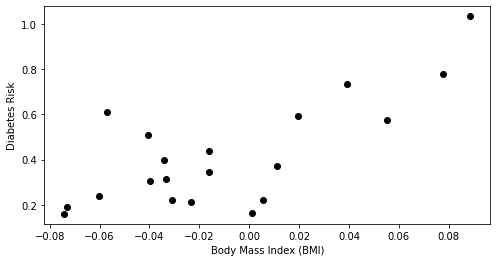

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 4]

import numpy as np
import pandas as pd
from sklearn import datasets

# Load the diabetes dataset
X, y = datasets.load_diabetes(return_X_y=True, as_frame=True)

# add an extra column of onens
X['one'] = 1

# Collect 20 data points and only use bmi dimension
X_train = X.iloc[-20:].loc[:, ['bmi', 'one']]
y_train = y.iloc[-20:] / 300

plt.scatter(X_train.loc[:,['bmi']], y_train,  color='black')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')
plt.show()

## 1.3 Prediction
Function $f(X, \theta)$ calculates the prediction at each iteration.

The mean_squared_error computes the loss for each prediction:
$$ mse = \frac{1}{2n}\sum_i (y - \hat{y})^2$$

The mse_gradient the loss gradient at each iteration which is used in graient descent.

In [2]:
def f(X, theta):
    """The linear model we are trying to fit.
    
    Parameters:
    theta (np.array): d-dimensional vector of parameters
    X (np.array): (n,d)-dimensional data matrix
    
    Returns:
    y_pred (np.array): n-dimensional vector of predicted targets
    """
    return X.dot(theta)

In [3]:
def mean_squared_error(theta, X, y):
    """The cost function, J, describing the goodness of fit.
    
    Parameters:
    theta (np.array): d-dimensional vector of parameters
    X (np.array): (n,d)-dimensional design matrix
    y (np.array): n-dimensional vector of targets
    """
    return 0.5*np.mean((y-f(X, theta))**2)

In [4]:
def mse_gradient(theta, X, y):
    """The gradient of the cost function.
    
    Parameters:
    theta (np.array): d-dimensional vector of parameters
    X (np.array): (n,d)-dimensional design matrix
    y (np.array): n-dimensional vector of targets
    
    Returns:
    grad (np.array): d-dimensional gradient of the MSE
    """
    return np.mean((f(X, theta) - y) * X.T, axis=1)

## 1.4 Gradient descent
$$ \theta := \theta - \alpha \nabla \theta $$

$\theta$ is intitialized and at each iteration a new approximation to $\theta$ is computed using gradient descent. 

The learning rate $\alpha$ is set to 0.4 and the iterations are terminated when $\theta$ doesn't improve beyond 3 decimals.

In [9]:
threshold = 1e-3
step_size = 4e-1
theta, theta_prev = np.array([2,1]), np.ones(2,)
opt_pts = [theta]
opt_grads = []
mse = []
iter = 0

while np.linalg.norm(theta - theta_prev) > threshold:
    mse += [mean_squared_error(theta, X_train, y_train)]
    if iter % 100 == 0:
        print('Iteration %d. MSE: %.6f' % (iter, mse[iter]))
    theta_prev = theta
    gradient = mse_gradient(theta, X_train, y_train)
    theta = theta_prev - step_size * gradient
    opt_pts += [theta]
    opt_grads += [gradient]
    iter += 1

Iteration 0. MSE: 0.171729
Iteration 100. MSE: 0.014765
Iteration 200. MSE: 0.014349
Iteration 300. MSE: 0.013997
Iteration 400. MSE: 0.013701


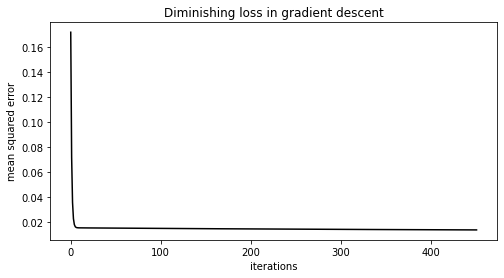

In [6]:
iter = np.linspace(0, len(mse)-1, len(mse))
plt.plot(iter, mse, 'k')
plt.xlabel("iterations")
plt.ylabel("mean squared error")
plt.title("Diminishing loss in gradient descent")
plt.show()

In [7]:
print("Optimal solution:")
print(opt_pts[-1])

Optimal solution:
bmi    2.555471
one    0.446141
dtype: float64


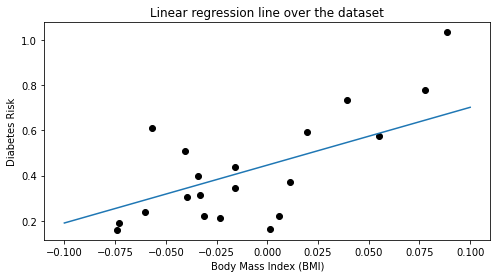

In [8]:
x_line = np.stack([np.linspace(-0.1, 0.1, 10), np.ones(10,)])
y_line = opt_pts[-1].dot(x_line)

plt.scatter(X_train.loc[:,['bmi']], y_train,  color='black')
plt.plot(x_line[0], y_line)
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')
plt.title("Linear regression line over the dataset")
plt.show()